http://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf

In [1]:
#need to install lightgbm from anacondra prompt

In [2]:
#Data Preparation
#We will now import some required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

#Loading the dataset
dataset = pd.read_csv('bank-additional-full.csv',delimiter=";")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

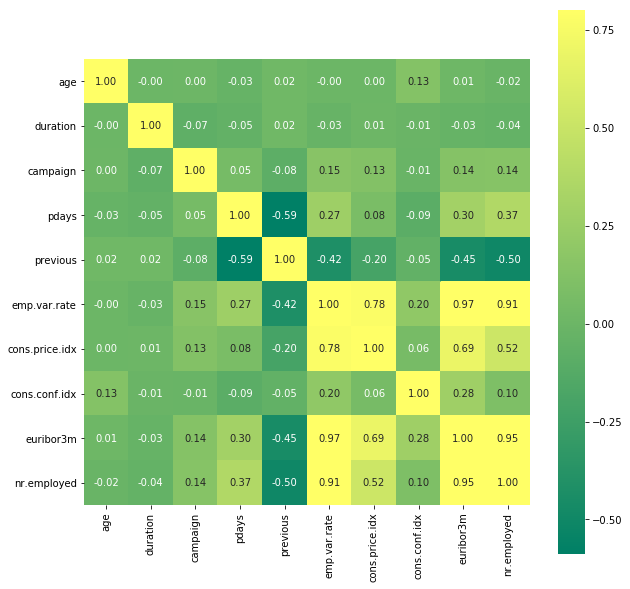

In [5]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

In [6]:
# Check for null values. 
dataset.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
 
features = []; categorical_features = []
num_of_columns = dataset.shape[1]
 
for i in range(0, num_of_columns):
 column_name = dataset.columns[i]
 column_type = dataset[column_name].dtypes
 
 if i != num_of_columns - 1: #skip target
  features.append(column_name)
 
 if column_type == 'object':
  le.fit(dataset[column_name])
  feature_classes = list(le.classes_)
  encoded_feature = le.transform(dataset[column_name])
  dataset[column_name] = pd.DataFrame(encoded_feature)
 
  if i != num_of_columns - 1: #skip target
   categorical_features.append(column_name)

In [8]:
# splitting data
X = dataset.drop(['y'], axis=1)
y = dataset['y']

In [9]:
#encode catagorical features
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder()
#for i in range(1,10):
#    X[:,i] = labelencoder_X.fit_transform(X[:,i])
#X[:,14] = labelencoder_X.fit_transform(X[:,14])
#labelencoder_y = LabelEncoder()
#y = labelencoder_y.fit_transform(y)

In [10]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train.shape

(35009, 20)

In [11]:
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's l1: 0.190447	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.310295
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.182851	valid_0's auc: 0.936927	valid_0's binary_logloss: 0.286569
[3]	valid_0's l1: 0.175887	valid_0's auc: 0.938012	valid_0's binary_logloss: 0.268599
[4]	valid_0's l1: 0.169552	valid_0's auc: 0.942752	valid_0's binary_logloss: 0.254207
[5]	valid_0's l1: 0.163916	valid_0's auc: 0.943227	valid_0's binary_logloss: 0.242611
[6]	valid_0's l1: 0.158744	valid_0's auc: 0.945209	valid_0's binary_logloss: 0.232877
[7]	valid_0's l1: 0.154213	valid_0's auc: 0.94554	valid_0's binary_logloss: 0.224895
[8]	valid_0's l1: 0.150136	valid_0's auc: 0.945442	valid_0's binary_logloss: 0.218311
[9]	valid_0's l1: 0.146419	valid_0's auc: 0.945185	valid_0's binary_logloss: 0.21277
[10]	valid_0's l1: 0.142975	valid_0's auc: 0.94727	valid_0's binary_logloss: 0.207433
[11]	valid_0's l1: 0.139825	valid_0's auc: 0.947851	valid_0's binary_logloss: 0.2

[1]	valid_0's l1: 0.190422	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.309699
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.182565	valid_0's auc: 0.941308	valid_0's binary_logloss: 0.284853
[3]	valid_0's l1: 0.175451	valid_0's auc: 0.940428	valid_0's binary_logloss: 0.266396
[4]	valid_0's l1: 0.169196	valid_0's auc: 0.940747	valid_0's binary_logloss: 0.252175
[5]	valid_0's l1: 0.163492	valid_0's auc: 0.943201	valid_0's binary_logloss: 0.240483
[6]	valid_0's l1: 0.15852	valid_0's auc: 0.945598	valid_0's binary_logloss: 0.231275
[7]	valid_0's l1: 0.153935	valid_0's auc: 0.945653	valid_0's binary_logloss: 0.223341
[8]	valid_0's l1: 0.14964	valid_0's auc: 0.945832	valid_0's binary_logloss: 0.216387
[9]	valid_0's l1: 0.145949	valid_0's auc: 0.94787	valid_0's binary_logloss: 0.210666
[10]	valid_0's l1: 0.142449	valid_0's auc: 0.947916	valid_0's binary_logloss: 0.205591
[11]	valid_0's l1: 0.139226	valid_0's auc: 0.948045	valid_0's binary_logloss: 0.2

[1]	valid_0's l1: 0.190447	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.310295
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.182851	valid_0's auc: 0.936927	valid_0's binary_logloss: 0.286569
[3]	valid_0's l1: 0.175887	valid_0's auc: 0.938012	valid_0's binary_logloss: 0.268599
[4]	valid_0's l1: 0.169552	valid_0's auc: 0.942752	valid_0's binary_logloss: 0.254207
[5]	valid_0's l1: 0.163916	valid_0's auc: 0.943227	valid_0's binary_logloss: 0.242611
[6]	valid_0's l1: 0.158744	valid_0's auc: 0.945209	valid_0's binary_logloss: 0.232877
[7]	valid_0's l1: 0.154213	valid_0's auc: 0.94554	valid_0's binary_logloss: 0.224895
[8]	valid_0's l1: 0.150136	valid_0's auc: 0.945442	valid_0's binary_logloss: 0.218311
[9]	valid_0's l1: 0.146419	valid_0's auc: 0.945185	valid_0's binary_logloss: 0.21277
[10]	valid_0's l1: 0.142975	valid_0's auc: 0.94727	valid_0's binary_logloss: 0.207433
[11]	valid_0's l1: 0.139825	valid_0's auc: 0.947851	valid_0's binary_logloss: 0.2

[27]	valid_0's l1: 0.11531	valid_0's auc: 0.95024	valid_0's binary_logloss: 0.174525
[28]	valid_0's l1: 0.114658	valid_0's auc: 0.950202	valid_0's binary_logloss: 0.174018
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.114658	valid_0's auc: 0.950202	valid_0's binary_logloss: 0.174018
[1]	valid_0's l1: 0.190375	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.309404
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.182675	valid_0's auc: 0.937752	valid_0's binary_logloss: 0.285137
[3]	valid_0's l1: 0.175691	valid_0's auc: 0.941968	valid_0's binary_logloss: 0.266974
[4]	valid_0's l1: 0.169551	valid_0's auc: 0.942053	valid_0's binary_logloss: 0.252954
[5]	valid_0's l1: 0.163934	valid_0's auc: 0.942334	valid_0's binary_logloss: 0.241613
[6]	valid_0's l1: 0.1589	valid_0's auc: 0.944142	valid_0's binary_logloss: 0.232461
[7]	valid_0's l1: 0.15428	valid_0's auc: 0.945998	valid_0's binary_logloss: 0.224334
[8]	valid_0's l1: 0.150218	valid_

[1]	valid_0's l1: 0.190375	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.309404
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.182675	valid_0's auc: 0.937752	valid_0's binary_logloss: 0.285137
[3]	valid_0's l1: 0.175691	valid_0's auc: 0.941968	valid_0's binary_logloss: 0.266974
[4]	valid_0's l1: 0.169551	valid_0's auc: 0.942053	valid_0's binary_logloss: 0.252954
[5]	valid_0's l1: 0.163934	valid_0's auc: 0.942334	valid_0's binary_logloss: 0.241613
[6]	valid_0's l1: 0.1589	valid_0's auc: 0.944142	valid_0's binary_logloss: 0.232461
[7]	valid_0's l1: 0.15428	valid_0's auc: 0.945998	valid_0's binary_logloss: 0.224334
[8]	valid_0's l1: 0.150218	valid_0's auc: 0.945925	valid_0's binary_logloss: 0.217947
[9]	valid_0's l1: 0.146381	valid_0's auc: 0.946015	valid_0's binary_logloss: 0.212126
[10]	valid_0's l1: 0.142907	valid_0's auc: 0.946335	valid_0's binary_logloss: 0.207156
[11]	valid_0's l1: 0.139674	valid_0's auc: 0.94652	valid_0's binary_logloss: 0.20

[1]	valid_0's l1: 0.190375	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.309404
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.182675	valid_0's auc: 0.937752	valid_0's binary_logloss: 0.285137
[3]	valid_0's l1: 0.175691	valid_0's auc: 0.941968	valid_0's binary_logloss: 0.266974
[4]	valid_0's l1: 0.169551	valid_0's auc: 0.942053	valid_0's binary_logloss: 0.252954
[5]	valid_0's l1: 0.163934	valid_0's auc: 0.942334	valid_0's binary_logloss: 0.241613
[6]	valid_0's l1: 0.1589	valid_0's auc: 0.944142	valid_0's binary_logloss: 0.232461
[7]	valid_0's l1: 0.15428	valid_0's auc: 0.945998	valid_0's binary_logloss: 0.224334
[8]	valid_0's l1: 0.150218	valid_0's auc: 0.945925	valid_0's binary_logloss: 0.217947
[9]	valid_0's l1: 0.146381	valid_0's auc: 0.946015	valid_0's binary_logloss: 0.212126
[10]	valid_0's l1: 0.142907	valid_0's auc: 0.946335	valid_0's binary_logloss: 0.207156
[11]	valid_0's l1: 0.139674	valid_0's auc: 0.94652	valid_0's binary_logloss: 0.20

[1]	valid_0's l1: 0.190375	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.309404
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.182675	valid_0's auc: 0.937752	valid_0's binary_logloss: 0.285137
[3]	valid_0's l1: 0.175691	valid_0's auc: 0.941968	valid_0's binary_logloss: 0.266974
[4]	valid_0's l1: 0.169551	valid_0's auc: 0.942053	valid_0's binary_logloss: 0.252954
[5]	valid_0's l1: 0.163934	valid_0's auc: 0.942334	valid_0's binary_logloss: 0.241613
[6]	valid_0's l1: 0.1589	valid_0's auc: 0.944142	valid_0's binary_logloss: 0.232461
[7]	valid_0's l1: 0.15428	valid_0's auc: 0.945998	valid_0's binary_logloss: 0.224334
[8]	valid_0's l1: 0.150218	valid_0's auc: 0.945925	valid_0's binary_logloss: 0.217947
[9]	valid_0's l1: 0.146381	valid_0's auc: 0.946015	valid_0's binary_logloss: 0.212126
[10]	valid_0's l1: 0.142907	valid_0's auc: 0.946335	valid_0's binary_logloss: 0.207156
[11]	valid_0's l1: 0.139674	valid_0's auc: 0.94652	valid_0's binary_logloss: 0.20

[1]	valid_0's l1: 0.188141	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.300513
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178632	valid_0's auc: 0.939661	valid_0's binary_logloss: 0.273216
[3]	valid_0's l1: 0.170375	valid_0's auc: 0.940546	valid_0's binary_logloss: 0.253938
[4]	valid_0's l1: 0.163275	valid_0's auc: 0.942944	valid_0's binary_logloss: 0.23956
[5]	valid_0's l1: 0.157088	valid_0's auc: 0.945499	valid_0's binary_logloss: 0.228261
[6]	valid_0's l1: 0.151656	valid_0's auc: 0.945458	valid_0's binary_logloss: 0.219388
[7]	valid_0's l1: 0.146779	valid_0's auc: 0.945243	valid_0's binary_logloss: 0.21186
[8]	valid_0's l1: 0.142436	valid_0's auc: 0.947208	valid_0's binary_logloss: 0.205487
[9]	valid_0's l1: 0.138445	valid_0's auc: 0.947706	valid_0's binary_logloss: 0.200091
[10]	valid_0's l1: 0.134831	valid_0's auc: 0.948133	valid_0's binary_logloss: 0.195326
[11]	valid_0's l1: 0.131783	valid_0's auc: 0.948463	valid_0's binary_logloss: 0.

[1]	valid_0's l1: 0.188193	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.301227
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178915	valid_0's auc: 0.937226	valid_0's binary_logloss: 0.27506
[3]	valid_0's l1: 0.170672	valid_0's auc: 0.939038	valid_0's binary_logloss: 0.255827
[4]	valid_0's l1: 0.16349	valid_0's auc: 0.943695	valid_0's binary_logloss: 0.241013
[5]	valid_0's l1: 0.157284	valid_0's auc: 0.945024	valid_0's binary_logloss: 0.229672
[6]	valid_0's l1: 0.151782	valid_0's auc: 0.94516	valid_0's binary_logloss: 0.220655
[7]	valid_0's l1: 0.147021	valid_0's auc: 0.945072	valid_0's binary_logloss: 0.213349
[8]	valid_0's l1: 0.142693	valid_0's auc: 0.947335	valid_0's binary_logloss: 0.206692
[9]	valid_0's l1: 0.138903	valid_0's auc: 0.947703	valid_0's binary_logloss: 0.201467
[10]	valid_0's l1: 0.135426	valid_0's auc: 0.948258	valid_0's binary_logloss: 0.196829
[11]	valid_0's l1: 0.13227	valid_0's auc: 0.948507	valid_0's binary_logloss: 0.19

[1]	valid_0's l1: 0.188093	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.300142
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178858	valid_0's auc: 0.937611	valid_0's binary_logloss: 0.273838
[3]	valid_0's l1: 0.170771	valid_0's auc: 0.941789	valid_0's binary_logloss: 0.254816
[4]	valid_0's l1: 0.163688	valid_0's auc: 0.941987	valid_0's binary_logloss: 0.240583
[5]	valid_0's l1: 0.157438	valid_0's auc: 0.944095	valid_0's binary_logloss: 0.229317
[6]	valid_0's l1: 0.151821	valid_0's auc: 0.946025	valid_0's binary_logloss: 0.219938
[7]	valid_0's l1: 0.146937	valid_0's auc: 0.946163	valid_0's binary_logloss: 0.212655
[8]	valid_0's l1: 0.142611	valid_0's auc: 0.946187	valid_0's binary_logloss: 0.206502
[9]	valid_0's l1: 0.138749	valid_0's auc: 0.946383	valid_0's binary_logloss: 0.201244
[10]	valid_0's l1: 0.135367	valid_0's auc: 0.94712	valid_0's binary_logloss: 0.197018
[11]	valid_0's l1: 0.132402	valid_0's auc: 0.947283	valid_0's binary_logloss: 0

[1]	valid_0's l1: 0.188141	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.300513
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178632	valid_0's auc: 0.939661	valid_0's binary_logloss: 0.273216
[3]	valid_0's l1: 0.170375	valid_0's auc: 0.940546	valid_0's binary_logloss: 0.253938
[4]	valid_0's l1: 0.163275	valid_0's auc: 0.942944	valid_0's binary_logloss: 0.23956
[5]	valid_0's l1: 0.157088	valid_0's auc: 0.945499	valid_0's binary_logloss: 0.228261
[6]	valid_0's l1: 0.151656	valid_0's auc: 0.945458	valid_0's binary_logloss: 0.219388
[7]	valid_0's l1: 0.146779	valid_0's auc: 0.945243	valid_0's binary_logloss: 0.21186
[8]	valid_0's l1: 0.142436	valid_0's auc: 0.947208	valid_0's binary_logloss: 0.205487
[9]	valid_0's l1: 0.138445	valid_0's auc: 0.947706	valid_0's binary_logloss: 0.200091
[10]	valid_0's l1: 0.134831	valid_0's auc: 0.948133	valid_0's binary_logloss: 0.195326
[11]	valid_0's l1: 0.131783	valid_0's auc: 0.948463	valid_0's binary_logloss: 0.

[1]	valid_0's l1: 0.188193	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.301227
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178915	valid_0's auc: 0.937226	valid_0's binary_logloss: 0.27506
[3]	valid_0's l1: 0.170672	valid_0's auc: 0.939038	valid_0's binary_logloss: 0.255827
[4]	valid_0's l1: 0.16349	valid_0's auc: 0.943695	valid_0's binary_logloss: 0.241013
[5]	valid_0's l1: 0.157284	valid_0's auc: 0.945024	valid_0's binary_logloss: 0.229672
[6]	valid_0's l1: 0.151782	valid_0's auc: 0.94516	valid_0's binary_logloss: 0.220655
[7]	valid_0's l1: 0.147021	valid_0's auc: 0.945072	valid_0's binary_logloss: 0.213349
[8]	valid_0's l1: 0.142693	valid_0's auc: 0.947335	valid_0's binary_logloss: 0.206692
[9]	valid_0's l1: 0.138903	valid_0's auc: 0.947703	valid_0's binary_logloss: 0.201467
[10]	valid_0's l1: 0.135426	valid_0's auc: 0.948258	valid_0's binary_logloss: 0.196829
[11]	valid_0's l1: 0.13227	valid_0's auc: 0.948507	valid_0's binary_logloss: 0.19

[1]	valid_0's l1: 0.188093	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.300142
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178858	valid_0's auc: 0.937611	valid_0's binary_logloss: 0.273838
[3]	valid_0's l1: 0.170771	valid_0's auc: 0.941789	valid_0's binary_logloss: 0.254816
[4]	valid_0's l1: 0.163688	valid_0's auc: 0.941987	valid_0's binary_logloss: 0.240583
[5]	valid_0's l1: 0.157438	valid_0's auc: 0.944095	valid_0's binary_logloss: 0.229317
[6]	valid_0's l1: 0.151821	valid_0's auc: 0.946025	valid_0's binary_logloss: 0.219938
[7]	valid_0's l1: 0.146937	valid_0's auc: 0.946163	valid_0's binary_logloss: 0.212655
[8]	valid_0's l1: 0.142611	valid_0's auc: 0.946187	valid_0's binary_logloss: 0.206502
[9]	valid_0's l1: 0.138749	valid_0's auc: 0.946383	valid_0's binary_logloss: 0.201244
[10]	valid_0's l1: 0.135367	valid_0's auc: 0.94712	valid_0's binary_logloss: 0.197018
[11]	valid_0's l1: 0.132402	valid_0's auc: 0.947283	valid_0's binary_logloss: 0

[1]	valid_0's l1: 0.185833	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.29174
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175102	valid_0's auc: 0.939025	valid_0's binary_logloss: 0.263299
[3]	valid_0's l1: 0.165783	valid_0's auc: 0.942395	valid_0's binary_logloss: 0.243412
[4]	valid_0's l1: 0.158119	valid_0's auc: 0.94502	valid_0's binary_logloss: 0.22966
[5]	valid_0's l1: 0.151507	valid_0's auc: 0.944938	valid_0's binary_logloss: 0.218813
[6]	valid_0's l1: 0.145766	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.210351
[7]	valid_0's l1: 0.140728	valid_0's auc: 0.94646	valid_0's binary_logloss: 0.203307
[8]	valid_0's l1: 0.136299	valid_0's auc: 0.947022	valid_0's binary_logloss: 0.197373
[9]	valid_0's l1: 0.132526	valid_0's auc: 0.947768	valid_0's binary_logloss: 0.192576
[10]	valid_0's l1: 0.129088	valid_0's auc: 0.948122	valid_0's binary_logloss: 0.188326
[11]	valid_0's l1: 0.126313	valid_0's auc: 0.948083	valid_0's binary_logloss: 0.18

[6]	valid_0's l1: 0.146068	valid_0's auc: 0.944921	valid_0's binary_logloss: 0.211625
[7]	valid_0's l1: 0.141026	valid_0's auc: 0.945642	valid_0's binary_logloss: 0.204318
[8]	valid_0's l1: 0.13658	valid_0's auc: 0.947992	valid_0's binary_logloss: 0.198213
[9]	valid_0's l1: 0.132715	valid_0's auc: 0.948574	valid_0's binary_logloss: 0.193275
[10]	valid_0's l1: 0.129462	valid_0's auc: 0.948818	valid_0's binary_logloss: 0.189277
[11]	valid_0's l1: 0.126603	valid_0's auc: 0.949085	valid_0's binary_logloss: 0.186028
[12]	valid_0's l1: 0.124062	valid_0's auc: 0.9493	valid_0's binary_logloss: 0.183346
[13]	valid_0's l1: 0.121899	valid_0's auc: 0.949413	valid_0's binary_logloss: 0.181004
[14]	valid_0's l1: 0.120041	valid_0's auc: 0.950297	valid_0's binary_logloss: 0.178958
[15]	valid_0's l1: 0.118436	valid_0's auc: 0.950235	valid_0's binary_logloss: 0.177549
[16]	valid_0's l1: 0.116912	valid_0's auc: 0.950496	valid_0's binary_logloss: 0.176055
[17]	valid_0's l1: 0.11585	valid_0's auc: 0.950381

[1]	valid_0's l1: 0.185833	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.29174
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175102	valid_0's auc: 0.939025	valid_0's binary_logloss: 0.263299
[3]	valid_0's l1: 0.165783	valid_0's auc: 0.942395	valid_0's binary_logloss: 0.243412
[4]	valid_0's l1: 0.158119	valid_0's auc: 0.94502	valid_0's binary_logloss: 0.22966
[5]	valid_0's l1: 0.151507	valid_0's auc: 0.944938	valid_0's binary_logloss: 0.218813
[6]	valid_0's l1: 0.145766	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.210351
[7]	valid_0's l1: 0.140728	valid_0's auc: 0.94646	valid_0's binary_logloss: 0.203307
[8]	valid_0's l1: 0.136299	valid_0's auc: 0.947022	valid_0's binary_logloss: 0.197373
[9]	valid_0's l1: 0.132526	valid_0's auc: 0.947768	valid_0's binary_logloss: 0.192576
[10]	valid_0's l1: 0.129088	valid_0's auc: 0.948122	valid_0's binary_logloss: 0.188326
[11]	valid_0's l1: 0.126313	valid_0's auc: 0.948083	valid_0's binary_logloss: 0.18

[1]	valid_0's l1: 0.185919	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.292555
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175228	valid_0's auc: 0.937248	valid_0's binary_logloss: 0.265049
[3]	valid_0's l1: 0.166003	valid_0's auc: 0.942689	valid_0's binary_logloss: 0.245301
[4]	valid_0's l1: 0.158346	valid_0's auc: 0.942932	valid_0's binary_logloss: 0.231317
[5]	valid_0's l1: 0.151705	valid_0's auc: 0.945064	valid_0's binary_logloss: 0.220162
[6]	valid_0's l1: 0.146068	valid_0's auc: 0.944921	valid_0's binary_logloss: 0.211625
[7]	valid_0's l1: 0.141026	valid_0's auc: 0.945642	valid_0's binary_logloss: 0.204318
[8]	valid_0's l1: 0.13658	valid_0's auc: 0.947992	valid_0's binary_logloss: 0.198213
[9]	valid_0's l1: 0.132715	valid_0's auc: 0.948574	valid_0's binary_logloss: 0.193275
[10]	valid_0's l1: 0.129462	valid_0's auc: 0.948818	valid_0's binary_logloss: 0.189277
[11]	valid_0's l1: 0.126603	valid_0's auc: 0.949085	valid_0's binary_logloss: 0

[1]	valid_0's l1: 0.185788	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.291292
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175004	valid_0's auc: 0.938292	valid_0's binary_logloss: 0.263144
[3]	valid_0's l1: 0.166178	valid_0's auc: 0.941583	valid_0's binary_logloss: 0.244466
[4]	valid_0's l1: 0.158656	valid_0's auc: 0.941251	valid_0's binary_logloss: 0.23082
[5]	valid_0's l1: 0.151843	valid_0's auc: 0.945369	valid_0's binary_logloss: 0.219446
[6]	valid_0's l1: 0.146099	valid_0's auc: 0.944835	valid_0's binary_logloss: 0.211185
[7]	valid_0's l1: 0.140966	valid_0's auc: 0.945394	valid_0's binary_logloss: 0.204167
[8]	valid_0's l1: 0.13637	valid_0's auc: 0.946092	valid_0's binary_logloss: 0.198157
[9]	valid_0's l1: 0.132745	valid_0's auc: 0.946854	valid_0's binary_logloss: 0.19377
[10]	valid_0's l1: 0.129519	valid_0's auc: 0.947416	valid_0's binary_logloss: 0.189824
[11]	valid_0's l1: 0.126743	valid_0's auc: 0.947539	valid_0's binary_logloss: 0.1

[1]	valid_0's l1: 0.185833	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.29174
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175102	valid_0's auc: 0.939025	valid_0's binary_logloss: 0.263299
[3]	valid_0's l1: 0.165783	valid_0's auc: 0.942395	valid_0's binary_logloss: 0.243412
[4]	valid_0's l1: 0.158119	valid_0's auc: 0.94502	valid_0's binary_logloss: 0.22966
[5]	valid_0's l1: 0.151507	valid_0's auc: 0.944938	valid_0's binary_logloss: 0.218813
[6]	valid_0's l1: 0.145766	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.210351
[7]	valid_0's l1: 0.140728	valid_0's auc: 0.94646	valid_0's binary_logloss: 0.203307
[8]	valid_0's l1: 0.136299	valid_0's auc: 0.947022	valid_0's binary_logloss: 0.197373
[9]	valid_0's l1: 0.132526	valid_0's auc: 0.947768	valid_0's binary_logloss: 0.192576
[10]	valid_0's l1: 0.129088	valid_0's auc: 0.948122	valid_0's binary_logloss: 0.188326
[11]	valid_0's l1: 0.126313	valid_0's auc: 0.948083	valid_0's binary_logloss: 0.18

[1]	valid_0's l1: 0.18346	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.282882
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.171421	valid_0's auc: 0.941464	valid_0's binary_logloss: 0.254091
[3]	valid_0's l1: 0.161633	valid_0's auc: 0.942256	valid_0's binary_logloss: 0.235141
[4]	valid_0's l1: 0.153261	valid_0's auc: 0.94457	valid_0's binary_logloss: 0.221192
[5]	valid_0's l1: 0.146234	valid_0's auc: 0.946394	valid_0's binary_logloss: 0.21081
[6]	valid_0's l1: 0.140469	valid_0's auc: 0.946174	valid_0's binary_logloss: 0.203165
[7]	valid_0's l1: 0.135443	valid_0's auc: 0.946622	valid_0's binary_logloss: 0.196938
[8]	valid_0's l1: 0.131238	valid_0's auc: 0.947536	valid_0's binary_logloss: 0.191872
[9]	valid_0's l1: 0.127783	valid_0's auc: 0.947978	valid_0's binary_logloss: 0.18795
[10]	valid_0's l1: 0.124853	valid_0's auc: 0.948133	valid_0's binary_logloss: 0.184954
[11]	valid_0's l1: 0.122443	valid_0's auc: 0.947868	valid_0's binary_logloss: 0.18

[1]	valid_0's l1: 0.183626	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.284306
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.171619	valid_0's auc: 0.937402	valid_0's binary_logloss: 0.255884
[3]	valid_0's l1: 0.161711	valid_0's auc: 0.942472	valid_0's binary_logloss: 0.236393
[4]	valid_0's l1: 0.153586	valid_0's auc: 0.944126	valid_0's binary_logloss: 0.222524
[5]	valid_0's l1: 0.146619	valid_0's auc: 0.944901	valid_0's binary_logloss: 0.211884
[6]	valid_0's l1: 0.140711	valid_0's auc: 0.945532	valid_0's binary_logloss: 0.203658
[7]	valid_0's l1: 0.135634	valid_0's auc: 0.948135	valid_0's binary_logloss: 0.19665
[8]	valid_0's l1: 0.131249	valid_0's auc: 0.948681	valid_0's binary_logloss: 0.191198
[9]	valid_0's l1: 0.127709	valid_0's auc: 0.948888	valid_0's binary_logloss: 0.187191
[10]	valid_0's l1: 0.124594	valid_0's auc: 0.949148	valid_0's binary_logloss: 0.183841
[11]	valid_0's l1: 0.122153	valid_0's auc: 0.949118	valid_0's binary_logloss: 0

[1]	valid_0's l1: 0.183502	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.283408
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.171415	valid_0's auc: 0.938813	valid_0's binary_logloss: 0.25405
[3]	valid_0's l1: 0.161336	valid_0's auc: 0.942255	valid_0's binary_logloss: 0.234364
[4]	valid_0's l1: 0.153281	valid_0's auc: 0.9449	valid_0's binary_logloss: 0.220721
[5]	valid_0's l1: 0.146353	valid_0's auc: 0.944804	valid_0's binary_logloss: 0.210496
[6]	valid_0's l1: 0.140428	valid_0's auc: 0.947106	valid_0's binary_logloss: 0.202183
[7]	valid_0's l1: 0.135322	valid_0's auc: 0.94746	valid_0's binary_logloss: 0.195667
[8]	valid_0's l1: 0.13115	valid_0's auc: 0.947488	valid_0's binary_logloss: 0.190873
[9]	valid_0's l1: 0.127477	valid_0's auc: 0.947711	valid_0's binary_logloss: 0.186827
[10]	valid_0's l1: 0.124351	valid_0's auc: 0.947958	valid_0's binary_logloss: 0.183568
[11]	valid_0's l1: 0.121741	valid_0's auc: 0.948632	valid_0's binary_logloss: 0.180

[1]	valid_0's l1: 0.18346	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.282882
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.171421	valid_0's auc: 0.941464	valid_0's binary_logloss: 0.254091
[3]	valid_0's l1: 0.161633	valid_0's auc: 0.942256	valid_0's binary_logloss: 0.235141
[4]	valid_0's l1: 0.153261	valid_0's auc: 0.94457	valid_0's binary_logloss: 0.221192
[5]	valid_0's l1: 0.146234	valid_0's auc: 0.946394	valid_0's binary_logloss: 0.21081
[6]	valid_0's l1: 0.140469	valid_0's auc: 0.946174	valid_0's binary_logloss: 0.203165
[7]	valid_0's l1: 0.135443	valid_0's auc: 0.946622	valid_0's binary_logloss: 0.196938
[8]	valid_0's l1: 0.131238	valid_0's auc: 0.947536	valid_0's binary_logloss: 0.191872
[9]	valid_0's l1: 0.127783	valid_0's auc: 0.947978	valid_0's binary_logloss: 0.18795
[10]	valid_0's l1: 0.124853	valid_0's auc: 0.948133	valid_0's binary_logloss: 0.184954
[11]	valid_0's l1: 0.122443	valid_0's auc: 0.947868	valid_0's binary_logloss: 0.18

[1]	valid_0's l1: 0.181317	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.276506
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.168044	valid_0's auc: 0.938266	valid_0's binary_logloss: 0.247601
[3]	valid_0's l1: 0.157518	valid_0's auc: 0.943446	valid_0's binary_logloss: 0.22811
[4]	valid_0's l1: 0.149306	valid_0's auc: 0.943923	valid_0's binary_logloss: 0.21586
[5]	valid_0's l1: 0.142041	valid_0's auc: 0.945009	valid_0's binary_logloss: 0.205412
[6]	valid_0's l1: 0.135923	valid_0's auc: 0.9478	valid_0's binary_logloss: 0.196974
[7]	valid_0's l1: 0.131003	valid_0's auc: 0.947772	valid_0's binary_logloss: 0.19131
[8]	valid_0's l1: 0.127008	valid_0's auc: 0.947766	valid_0's binary_logloss: 0.186945
[9]	valid_0's l1: 0.123677	valid_0's auc: 0.948414	valid_0's binary_logloss: 0.183462
[10]	valid_0's l1: 0.121092	valid_0's auc: 0.949185	valid_0's binary_logloss: 0.180775
[11]	valid_0's l1: 0.118897	valid_0's auc: 0.949332	valid_0's binary_logloss: 0.178

[1]	valid_0's l1: 0.18115	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.275545
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.168024	valid_0's auc: 0.938125	valid_0's binary_logloss: 0.246251
[3]	valid_0's l1: 0.15723	valid_0's auc: 0.943438	valid_0's binary_logloss: 0.22648
[4]	valid_0's l1: 0.148257	valid_0's auc: 0.945697	valid_0's binary_logloss: 0.212627
[5]	valid_0's l1: 0.141092	valid_0's auc: 0.948007	valid_0's binary_logloss: 0.202653
[6]	valid_0's l1: 0.135254	valid_0's auc: 0.948307	valid_0's binary_logloss: 0.195123
[7]	valid_0's l1: 0.130323	valid_0's auc: 0.948592	valid_0's binary_logloss: 0.189344
[8]	valid_0's l1: 0.126315	valid_0's auc: 0.948987	valid_0's binary_logloss: 0.184949
[9]	valid_0's l1: 0.122979	valid_0's auc: 0.949171	valid_0's binary_logloss: 0.181394
[10]	valid_0's l1: 0.120113	valid_0's auc: 0.950399	valid_0's binary_logloss: 0.178586
[11]	valid_0's l1: 0.117913	valid_0's auc: 0.950606	valid_0's binary_logloss: 0.1

[1]	valid_0's l1: 0.181113	valid_0's auc: 0.932992	valid_0's binary_logloss: 0.27494
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.167764	valid_0's auc: 0.942615	valid_0's binary_logloss: 0.245273
[3]	valid_0's l1: 0.157344	valid_0's auc: 0.942722	valid_0's binary_logloss: 0.226995
[4]	valid_0's l1: 0.148627	valid_0's auc: 0.946587	valid_0's binary_logloss: 0.213644
[5]	valid_0's l1: 0.141547	valid_0's auc: 0.946226	valid_0's binary_logloss: 0.204277
[6]	valid_0's l1: 0.135738	valid_0's auc: 0.946276	valid_0's binary_logloss: 0.197421
[7]	valid_0's l1: 0.130951	valid_0's auc: 0.947199	valid_0's binary_logloss: 0.191799
[8]	valid_0's l1: 0.127036	valid_0's auc: 0.947235	valid_0's binary_logloss: 0.187517
[9]	valid_0's l1: 0.123814	valid_0's auc: 0.947682	valid_0's binary_logloss: 0.184185
[10]	valid_0's l1: 0.121285	valid_0's auc: 0.948539	valid_0's binary_logloss: 0.181436
[11]	valid_0's l1: 0.119181	valid_0's auc: 0.948431	valid_0's binary_logloss: 0

[1]	valid_0's l1: 0.181317	valid_0's auc: 0.934766	valid_0's binary_logloss: 0.276506
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.168044	valid_0's auc: 0.938266	valid_0's binary_logloss: 0.247601
[3]	valid_0's l1: 0.157518	valid_0's auc: 0.943446	valid_0's binary_logloss: 0.22811
[4]	valid_0's l1: 0.149306	valid_0's auc: 0.943923	valid_0's binary_logloss: 0.21586
[5]	valid_0's l1: 0.142041	valid_0's auc: 0.945009	valid_0's binary_logloss: 0.205412
[6]	valid_0's l1: 0.135923	valid_0's auc: 0.9478	valid_0's binary_logloss: 0.196974
[7]	valid_0's l1: 0.131003	valid_0's auc: 0.947772	valid_0's binary_logloss: 0.19131
[8]	valid_0's l1: 0.127008	valid_0's auc: 0.947766	valid_0's binary_logloss: 0.186945
[9]	valid_0's l1: 0.123677	valid_0's auc: 0.948414	valid_0's binary_logloss: 0.183462
[10]	valid_0's l1: 0.121092	valid_0's auc: 0.949185	valid_0's binary_logloss: 0.180775
[11]	valid_0's l1: 0.118897	valid_0's auc: 0.949332	valid_0's binary_logloss: 0.178

[1]	valid_0's l1: 0.18115	valid_0's auc: 0.928834	valid_0's binary_logloss: 0.275545
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.168024	valid_0's auc: 0.938125	valid_0's binary_logloss: 0.246251
[3]	valid_0's l1: 0.15723	valid_0's auc: 0.943438	valid_0's binary_logloss: 0.22648
[4]	valid_0's l1: 0.148257	valid_0's auc: 0.945697	valid_0's binary_logloss: 0.212627
[5]	valid_0's l1: 0.141092	valid_0's auc: 0.948007	valid_0's binary_logloss: 0.202653
[6]	valid_0's l1: 0.135254	valid_0's auc: 0.948307	valid_0's binary_logloss: 0.195123
[7]	valid_0's l1: 0.130323	valid_0's auc: 0.948592	valid_0's binary_logloss: 0.189344
[8]	valid_0's l1: 0.126315	valid_0's auc: 0.948987	valid_0's binary_logloss: 0.184949
[9]	valid_0's l1: 0.122979	valid_0's auc: 0.949171	valid_0's binary_logloss: 0.181394
[10]	valid_0's l1: 0.120113	valid_0's auc: 0.950399	valid_0's binary_logloss: 0.178586
[11]	valid_0's l1: 0.117913	valid_0's auc: 0.950606	valid_0's binary_logloss: 0.1

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.125, 'n_estimators': 26}


In [13]:
gbm = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 26)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.188299	valid_0's auc: 0.933189	valid_0's binary_logloss: 0.301416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178965	valid_0's auc: 0.938169	valid_0's binary_logloss: 0.274235
[3]	valid_0's l1: 0.170815	valid_0's auc: 0.942776	valid_0's binary_logloss: 0.255115
[4]	valid_0's l1: 0.163789	valid_0's auc: 0.942845	valid_0's binary_logloss: 0.240946
[5]	valid_0's l1: 0.157596	valid_0's auc: 0.945202	valid_0's binary_logloss: 0.22949
[6]	valid_0's l1: 0.152196	valid_0's auc: 0.94477	valid_0's binary_logloss: 0.220651
[7]	valid_0's l1: 0.147299	valid_0's auc: 0.946511	valid_0's binary_logloss: 0.213122
[8]	valid_0's l1: 0.142819	valid_0's auc: 0.947358	valid_0's binary_logloss: 0.206551
[9]	valid_0's l1: 0.139006	valid_0's auc: 0.947629	valid_0's binary_logloss: 0.201198
[10]	valid_0's l1: 0.135571	valid_0's auc: 0.947883	valid_0's binary_logloss: 0.196552
[11]	valid_0's l1: 0.132398	valid_0's auc: 0.949121	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=26, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

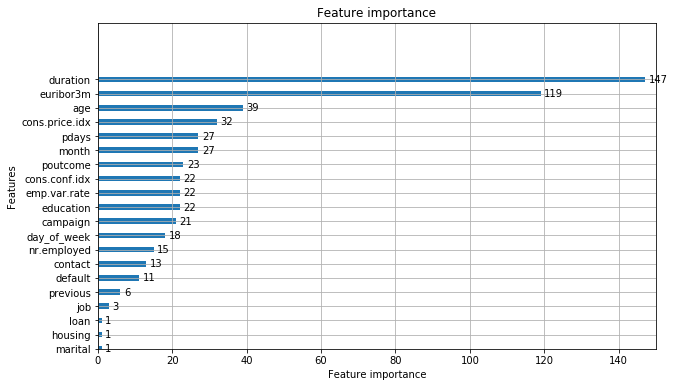

In [14]:
#Dimensionality reduction using feature importances
#features importance graph
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25,
                         ylabel='Features',
                         xlim = (0,150), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [15]:
# For each feature of our dataset, the result of the following
# code snippet contains numbers of times a feature is used in a model.
sorted(gbm.feature_importances_,reverse=True)

[147, 119, 39, 32, 27, 27, 23, 22, 22, 22, 21, 18, 15, 13, 11, 6, 3, 1, 1, 1]

In [16]:
# The code below aims to find where at least 85% 
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

21 0.8789473684210526


In [17]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.9506009383721328


In [18]:
#Drop features to reduce dimensionality to save training time and space

X = X.drop(['marital','housing','loan','job','previous','default','contact','nr.employed','day_of_week'], axis=1)


In [19]:
print(X)

       age  education  month  duration  campaign  pdays  poutcome  \
0       56          0      6       261         1    999         1   
1       57          3      6       149         1    999         1   
2       37          3      6       226         1    999         1   
3       40          1      6       151         1    999         1   
4       56          3      6       307         1    999         1   
5       45          2      6       198         1    999         1   
6       59          5      6       139         1    999         1   
7       41          7      6       217         1    999         1   
8       24          5      6       380         1    999         1   
9       25          3      6        50         1    999         1   
10      41          7      6        55         1    999         1   
11      25          3      6       222         1    999         1   
12      29          3      6       137         1    999         1   
13      57          0      6      

In [20]:
# Remake our test/train set with our reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)
print('Best parameters found by grid search are:', gridsearch.best_params_)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's l1: 0.190943	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.31133
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.183321	valid_0's auc: 0.931458	valid_0's binary_logloss: 0.287289
[3]	valid_0's l1: 0.17648	valid_0's auc: 0.939021	valid_0's binary_logloss: 0.269237
[4]	valid_0's l1: 0.17034	valid_0's auc: 0.939299	valid_0's binary_logloss: 0.255338
[5]	valid_0's l1: 0.164794	valid_0's auc: 0.940668	valid_0's binary_logloss: 0.244217
[6]	valid_0's l1: 0.159775	valid_0's auc: 0.940717	valid_0's binary_logloss: 0.235044
[7]	valid_0's l1: 0.155244	valid_0's auc: 0.940435	valid_0's binary_logloss: 0.227505
[8]	valid_0's l1: 0.151234	valid_0's auc: 0.940644	valid_0's binary_logloss: 0.221179
[9]	valid_0's l1: 0.147552	valid_0's auc: 0.942676	valid_0's binary_logloss: 0.215459
[10]	valid_0's l1: 0.144152	valid_0's auc: 0.942703	valid_0's binary_logloss: 0.210549
[11]	valid_0's l1: 0.141026	valid_0's auc: 0.942983	valid_0's binary_logloss: 0.2

[1]	valid_0's l1: 0.190821	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.310927
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.183163	valid_0's auc: 0.935993	valid_0's binary_logloss: 0.286621
[3]	valid_0's l1: 0.176298	valid_0's auc: 0.937718	valid_0's binary_logloss: 0.268649
[4]	valid_0's l1: 0.170147	valid_0's auc: 0.942418	valid_0's binary_logloss: 0.254657
[5]	valid_0's l1: 0.164566	valid_0's auc: 0.943383	valid_0's binary_logloss: 0.243199
[6]	valid_0's l1: 0.1596	valid_0's auc: 0.943108	valid_0's binary_logloss: 0.233981
[7]	valid_0's l1: 0.155304	valid_0's auc: 0.943679	valid_0's binary_logloss: 0.226631
[8]	valid_0's l1: 0.151298	valid_0's auc: 0.943454	valid_0's binary_logloss: 0.220399
[9]	valid_0's l1: 0.147707	valid_0's auc: 0.943344	valid_0's binary_logloss: 0.215021
[10]	valid_0's l1: 0.144357	valid_0's auc: 0.94458	valid_0's binary_logloss: 0.21013
[11]	valid_0's l1: 0.141346	valid_0's auc: 0.944842	valid_0's binary_logloss: 0.20

[21]	valid_0's l1: 0.122032	valid_0's auc: 0.948162	valid_0's binary_logloss: 0.182189
[22]	valid_0's l1: 0.120967	valid_0's auc: 0.948312	valid_0's binary_logloss: 0.180979
[23]	valid_0's l1: 0.11988	valid_0's auc: 0.948675	valid_0's binary_logloss: 0.179717
[24]	valid_0's l1: 0.118988	valid_0's auc: 0.94886	valid_0's binary_logloss: 0.178783
Did not meet early stopping. Best iteration is:
[24]	valid_0's l1: 0.118988	valid_0's auc: 0.94886	valid_0's binary_logloss: 0.178783
[1]	valid_0's l1: 0.190943	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.31133
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.183321	valid_0's auc: 0.931458	valid_0's binary_logloss: 0.287289
[3]	valid_0's l1: 0.17648	valid_0's auc: 0.939021	valid_0's binary_logloss: 0.269237
[4]	valid_0's l1: 0.17034	valid_0's auc: 0.939299	valid_0's binary_logloss: 0.255338
[5]	valid_0's l1: 0.164794	valid_0's auc: 0.940668	valid_0's binary_logloss: 0.244217
[6]	valid_0's l1: 0.159775	valid

[1]	valid_0's l1: 0.190747	valid_0's auc: 0.933014	valid_0's binary_logloss: 0.310471
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.183005	valid_0's auc: 0.938391	valid_0's binary_logloss: 0.286172
[3]	valid_0's l1: 0.176128	valid_0's auc: 0.939092	valid_0's binary_logloss: 0.268435
[4]	valid_0's l1: 0.170014	valid_0's auc: 0.939023	valid_0's binary_logloss: 0.254602
[5]	valid_0's l1: 0.164358	valid_0's auc: 0.939537	valid_0's binary_logloss: 0.243358
[6]	valid_0's l1: 0.159372	valid_0's auc: 0.941277	valid_0's binary_logloss: 0.234204
[7]	valid_0's l1: 0.15483	valid_0's auc: 0.941451	valid_0's binary_logloss: 0.226647
[8]	valid_0's l1: 0.150722	valid_0's auc: 0.942009	valid_0's binary_logloss: 0.220165
[9]	valid_0's l1: 0.147071	valid_0's auc: 0.94225	valid_0's binary_logloss: 0.214772
[10]	valid_0's l1: 0.14368	valid_0's auc: 0.942974	valid_0's binary_logloss: 0.209818
[11]	valid_0's l1: 0.14065	valid_0's auc: 0.94286	valid_0's binary_logloss: 0.205

[1]	valid_0's l1: 0.190821	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.310927
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.183163	valid_0's auc: 0.935993	valid_0's binary_logloss: 0.286621
[3]	valid_0's l1: 0.176298	valid_0's auc: 0.937718	valid_0's binary_logloss: 0.268649
[4]	valid_0's l1: 0.170147	valid_0's auc: 0.942418	valid_0's binary_logloss: 0.254657
[5]	valid_0's l1: 0.164566	valid_0's auc: 0.943383	valid_0's binary_logloss: 0.243199
[6]	valid_0's l1: 0.1596	valid_0's auc: 0.943108	valid_0's binary_logloss: 0.233981
[7]	valid_0's l1: 0.155304	valid_0's auc: 0.943679	valid_0's binary_logloss: 0.226631
[8]	valid_0's l1: 0.151298	valid_0's auc: 0.943454	valid_0's binary_logloss: 0.220399
[9]	valid_0's l1: 0.147707	valid_0's auc: 0.943344	valid_0's binary_logloss: 0.215021
[10]	valid_0's l1: 0.144357	valid_0's auc: 0.94458	valid_0's binary_logloss: 0.21013
[11]	valid_0's l1: 0.141346	valid_0's auc: 0.944842	valid_0's binary_logloss: 0.20

[1]	valid_0's l1: 0.190821	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.310927
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.183163	valid_0's auc: 0.935993	valid_0's binary_logloss: 0.286621
[3]	valid_0's l1: 0.176298	valid_0's auc: 0.937718	valid_0's binary_logloss: 0.268649
[4]	valid_0's l1: 0.170147	valid_0's auc: 0.942418	valid_0's binary_logloss: 0.254657
[5]	valid_0's l1: 0.164566	valid_0's auc: 0.943383	valid_0's binary_logloss: 0.243199
[6]	valid_0's l1: 0.1596	valid_0's auc: 0.943108	valid_0's binary_logloss: 0.233981
[7]	valid_0's l1: 0.155304	valid_0's auc: 0.943679	valid_0's binary_logloss: 0.226631
[8]	valid_0's l1: 0.151298	valid_0's auc: 0.943454	valid_0's binary_logloss: 0.220399
[9]	valid_0's l1: 0.147707	valid_0's auc: 0.943344	valid_0's binary_logloss: 0.215021
[10]	valid_0's l1: 0.144357	valid_0's auc: 0.94458	valid_0's binary_logloss: 0.21013
[11]	valid_0's l1: 0.141346	valid_0's auc: 0.944842	valid_0's binary_logloss: 0.20

[1]	valid_0's l1: 0.190821	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.310927
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.183163	valid_0's auc: 0.935993	valid_0's binary_logloss: 0.286621
[3]	valid_0's l1: 0.176298	valid_0's auc: 0.937718	valid_0's binary_logloss: 0.268649
[4]	valid_0's l1: 0.170147	valid_0's auc: 0.942418	valid_0's binary_logloss: 0.254657
[5]	valid_0's l1: 0.164566	valid_0's auc: 0.943383	valid_0's binary_logloss: 0.243199
[6]	valid_0's l1: 0.1596	valid_0's auc: 0.943108	valid_0's binary_logloss: 0.233981
[7]	valid_0's l1: 0.155304	valid_0's auc: 0.943679	valid_0's binary_logloss: 0.226631
[8]	valid_0's l1: 0.151298	valid_0's auc: 0.943454	valid_0's binary_logloss: 0.220399
[9]	valid_0's l1: 0.147707	valid_0's auc: 0.943344	valid_0's binary_logloss: 0.215021
[10]	valid_0's l1: 0.144357	valid_0's auc: 0.94458	valid_0's binary_logloss: 0.21013
[11]	valid_0's l1: 0.141346	valid_0's auc: 0.944842	valid_0's binary_logloss: 0.20

[3]	valid_0's l1: 0.171433	valid_0's auc: 0.94108	valid_0's binary_logloss: 0.256583
[4]	valid_0's l1: 0.164375	valid_0's auc: 0.941345	valid_0's binary_logloss: 0.242607
[5]	valid_0's l1: 0.158203	valid_0's auc: 0.941036	valid_0's binary_logloss: 0.231724
[6]	valid_0's l1: 0.152906	valid_0's auc: 0.941426	valid_0's binary_logloss: 0.223074
[7]	valid_0's l1: 0.14803	valid_0's auc: 0.941518	valid_0's binary_logloss: 0.215857
[8]	valid_0's l1: 0.143892	valid_0's auc: 0.943025	valid_0's binary_logloss: 0.209619
[9]	valid_0's l1: 0.140034	valid_0's auc: 0.943469	valid_0's binary_logloss: 0.204375
[10]	valid_0's l1: 0.136633	valid_0's auc: 0.943678	valid_0's binary_logloss: 0.200062
[11]	valid_0's l1: 0.133596	valid_0's auc: 0.944436	valid_0's binary_logloss: 0.196495
[12]	valid_0's l1: 0.130906	valid_0's auc: 0.945727	valid_0's binary_logloss: 0.192774
[13]	valid_0's l1: 0.128319	valid_0's auc: 0.946275	valid_0's binary_logloss: 0.189662
[14]	valid_0's l1: 0.126122	valid_0's auc: 0.947849	

[1]	valid_0's l1: 0.188423	valid_0's auc: 0.933014	valid_0's binary_logloss: 0.301088
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179066	valid_0's auc: 0.940372	valid_0's binary_logloss: 0.274231
[3]	valid_0's l1: 0.171072	valid_0's auc: 0.940338	valid_0's binary_logloss: 0.255719
[4]	valid_0's l1: 0.164086	valid_0's auc: 0.940849	valid_0's binary_logloss: 0.241626
[5]	valid_0's l1: 0.157992	valid_0's auc: 0.942204	valid_0's binary_logloss: 0.231027
[6]	valid_0's l1: 0.152521	valid_0's auc: 0.942157	valid_0's binary_logloss: 0.222294
[7]	valid_0's l1: 0.147719	valid_0's auc: 0.942631	valid_0's binary_logloss: 0.215248
[8]	valid_0's l1: 0.143507	valid_0's auc: 0.943024	valid_0's binary_logloss: 0.209375
[9]	valid_0's l1: 0.139794	valid_0's auc: 0.942929	valid_0's binary_logloss: 0.204319
[10]	valid_0's l1: 0.136445	valid_0's auc: 0.942693	valid_0's binary_logloss: 0.20014
[11]	valid_0's l1: 0.133555	valid_0's auc: 0.944158	valid_0's binary_logloss: 0

[1]	valid_0's l1: 0.188517	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.301633
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179358	valid_0's auc: 0.93678	valid_0's binary_logloss: 0.275118
[3]	valid_0's l1: 0.171277	valid_0's auc: 0.942903	valid_0's binary_logloss: 0.255869
[4]	valid_0's l1: 0.164359	valid_0's auc: 0.943363	valid_0's binary_logloss: 0.241687
[5]	valid_0's l1: 0.15821	valid_0's auc: 0.943398	valid_0's binary_logloss: 0.230772
[6]	valid_0's l1: 0.153006	valid_0's auc: 0.943881	valid_0's binary_logloss: 0.222314
[7]	valid_0's l1: 0.148158	valid_0's auc: 0.943797	valid_0's binary_logloss: 0.215096
[8]	valid_0's l1: 0.14396	valid_0's auc: 0.944259	valid_0's binary_logloss: 0.209374
[9]	valid_0's l1: 0.140109	valid_0's auc: 0.945093	valid_0's binary_logloss: 0.204148
[10]	valid_0's l1: 0.136881	valid_0's auc: 0.945224	valid_0's binary_logloss: 0.199996
[11]	valid_0's l1: 0.133821	valid_0's auc: 0.945856	valid_0's binary_logloss: 0.1

[1]	valid_0's l1: 0.188677	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.302147
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179509	valid_0's auc: 0.936272	valid_0's binary_logloss: 0.275432
[3]	valid_0's l1: 0.171433	valid_0's auc: 0.94108	valid_0's binary_logloss: 0.256583
[4]	valid_0's l1: 0.164375	valid_0's auc: 0.941345	valid_0's binary_logloss: 0.242607
[5]	valid_0's l1: 0.158203	valid_0's auc: 0.941036	valid_0's binary_logloss: 0.231724
[6]	valid_0's l1: 0.152906	valid_0's auc: 0.941426	valid_0's binary_logloss: 0.223074
[7]	valid_0's l1: 0.14803	valid_0's auc: 0.941518	valid_0's binary_logloss: 0.215857
[8]	valid_0's l1: 0.143892	valid_0's auc: 0.943025	valid_0's binary_logloss: 0.209619
[9]	valid_0's l1: 0.140034	valid_0's auc: 0.943469	valid_0's binary_logloss: 0.204375
[10]	valid_0's l1: 0.136633	valid_0's auc: 0.943678	valid_0's binary_logloss: 0.200062
[11]	valid_0's l1: 0.133596	valid_0's auc: 0.944436	valid_0's binary_logloss: 0.

[1]	valid_0's l1: 0.188677	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.302147
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179509	valid_0's auc: 0.936272	valid_0's binary_logloss: 0.275432
[3]	valid_0's l1: 0.171433	valid_0's auc: 0.94108	valid_0's binary_logloss: 0.256583
[4]	valid_0's l1: 0.164375	valid_0's auc: 0.941345	valid_0's binary_logloss: 0.242607
[5]	valid_0's l1: 0.158203	valid_0's auc: 0.941036	valid_0's binary_logloss: 0.231724
[6]	valid_0's l1: 0.152906	valid_0's auc: 0.941426	valid_0's binary_logloss: 0.223074
[7]	valid_0's l1: 0.14803	valid_0's auc: 0.941518	valid_0's binary_logloss: 0.215857
[8]	valid_0's l1: 0.143892	valid_0's auc: 0.943025	valid_0's binary_logloss: 0.209619
[9]	valid_0's l1: 0.140034	valid_0's auc: 0.943469	valid_0's binary_logloss: 0.204375
[10]	valid_0's l1: 0.136633	valid_0's auc: 0.943678	valid_0's binary_logloss: 0.200062
[11]	valid_0's l1: 0.133596	valid_0's auc: 0.944436	valid_0's binary_logloss: 0.

[1]	valid_0's l1: 0.188677	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.302147
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179509	valid_0's auc: 0.936272	valid_0's binary_logloss: 0.275432
[3]	valid_0's l1: 0.171433	valid_0's auc: 0.94108	valid_0's binary_logloss: 0.256583
[4]	valid_0's l1: 0.164375	valid_0's auc: 0.941345	valid_0's binary_logloss: 0.242607
[5]	valid_0's l1: 0.158203	valid_0's auc: 0.941036	valid_0's binary_logloss: 0.231724
[6]	valid_0's l1: 0.152906	valid_0's auc: 0.941426	valid_0's binary_logloss: 0.223074
[7]	valid_0's l1: 0.14803	valid_0's auc: 0.941518	valid_0's binary_logloss: 0.215857
[8]	valid_0's l1: 0.143892	valid_0's auc: 0.943025	valid_0's binary_logloss: 0.209619
[9]	valid_0's l1: 0.140034	valid_0's auc: 0.943469	valid_0's binary_logloss: 0.204375
[10]	valid_0's l1: 0.136633	valid_0's auc: 0.943678	valid_0's binary_logloss: 0.200062
[11]	valid_0's l1: 0.133596	valid_0's auc: 0.944436	valid_0's binary_logloss: 0.

[1]	valid_0's l1: 0.186382	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.293365
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.17588	valid_0's auc: 0.934378	valid_0's binary_logloss: 0.265711
[3]	valid_0's l1: 0.166942	valid_0's auc: 0.939571	valid_0's binary_logloss: 0.246596
[4]	valid_0's l1: 0.159308	valid_0's auc: 0.94111	valid_0's binary_logloss: 0.232954
[5]	valid_0's l1: 0.152864	valid_0's auc: 0.940896	valid_0's binary_logloss: 0.222584
[6]	valid_0's l1: 0.147108	valid_0's auc: 0.94112	valid_0's binary_logloss: 0.214
[7]	valid_0's l1: 0.142138	valid_0's auc: 0.943101	valid_0's binary_logloss: 0.206893
[8]	valid_0's l1: 0.137824	valid_0's auc: 0.944072	valid_0's binary_logloss: 0.201152
[9]	valid_0's l1: 0.134122	valid_0's auc: 0.944062	valid_0's binary_logloss: 0.196928
[10]	valid_0's l1: 0.130689	valid_0's auc: 0.946247	valid_0's binary_logloss: 0.192369
[11]	valid_0's l1: 0.127817	valid_0's auc: 0.946669	valid_0's binary_logloss: 0.1889

[2]	valid_0's l1: 0.175738	valid_0's auc: 0.941066	valid_0's binary_logloss: 0.265056
[3]	valid_0's l1: 0.166704	valid_0's auc: 0.94301	valid_0's binary_logloss: 0.24562
[4]	valid_0's l1: 0.159045	valid_0's auc: 0.943077	valid_0's binary_logloss: 0.231778
[5]	valid_0's l1: 0.152691	valid_0's auc: 0.943199	valid_0's binary_logloss: 0.221678
[6]	valid_0's l1: 0.147228	valid_0's auc: 0.943081	valid_0's binary_logloss: 0.213665
[7]	valid_0's l1: 0.142412	valid_0's auc: 0.944802	valid_0's binary_logloss: 0.206798
[8]	valid_0's l1: 0.138165	valid_0's auc: 0.944962	valid_0's binary_logloss: 0.20145
[9]	valid_0's l1: 0.134276	valid_0's auc: 0.946118	valid_0's binary_logloss: 0.19611
[10]	valid_0's l1: 0.131006	valid_0's auc: 0.946137	valid_0's binary_logloss: 0.192507
[11]	valid_0's l1: 0.128004	valid_0's auc: 0.94665	valid_0's binary_logloss: 0.188863
[12]	valid_0's l1: 0.125616	valid_0's auc: 0.948109	valid_0's binary_logloss: 0.185915
[13]	valid_0's l1: 0.123397	valid_0's auc: 0.948522	vali

[1]	valid_0's l1: 0.186382	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.293365
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.17588	valid_0's auc: 0.934378	valid_0's binary_logloss: 0.265711
[3]	valid_0's l1: 0.166942	valid_0's auc: 0.939571	valid_0's binary_logloss: 0.246596
[4]	valid_0's l1: 0.159308	valid_0's auc: 0.94111	valid_0's binary_logloss: 0.232954
[5]	valid_0's l1: 0.152864	valid_0's auc: 0.940896	valid_0's binary_logloss: 0.222584
[6]	valid_0's l1: 0.147108	valid_0's auc: 0.94112	valid_0's binary_logloss: 0.214
[7]	valid_0's l1: 0.142138	valid_0's auc: 0.943101	valid_0's binary_logloss: 0.206893
[8]	valid_0's l1: 0.137824	valid_0's auc: 0.944072	valid_0's binary_logloss: 0.201152
[9]	valid_0's l1: 0.134122	valid_0's auc: 0.944062	valid_0's binary_logloss: 0.196928
[10]	valid_0's l1: 0.130689	valid_0's auc: 0.946247	valid_0's binary_logloss: 0.192369
[11]	valid_0's l1: 0.127817	valid_0's auc: 0.946669	valid_0's binary_logloss: 0.1889

[1]	valid_0's l1: 0.186068	valid_0's auc: 0.933014	valid_0's binary_logloss: 0.29211
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175286	valid_0's auc: 0.94029	valid_0's binary_logloss: 0.263948
[3]	valid_0's l1: 0.166302	valid_0's auc: 0.940491	valid_0's binary_logloss: 0.24532
[4]	valid_0's l1: 0.158825	valid_0's auc: 0.941794	valid_0's binary_logloss: 0.231965
[5]	valid_0's l1: 0.152318	valid_0's auc: 0.941565	valid_0's binary_logloss: 0.221565
[6]	valid_0's l1: 0.146663	valid_0's auc: 0.942153	valid_0's binary_logloss: 0.213592
[7]	valid_0's l1: 0.141589	valid_0's auc: 0.942734	valid_0's binary_logloss: 0.206708
[8]	valid_0's l1: 0.137399	valid_0's auc: 0.94288	valid_0's binary_logloss: 0.201197
[9]	valid_0's l1: 0.133743	valid_0's auc: 0.94427	valid_0's binary_logloss: 0.196664
[10]	valid_0's l1: 0.130514	valid_0's auc: 0.945458	valid_0's binary_logloss: 0.192854
[11]	valid_0's l1: 0.127573	valid_0's auc: 0.946316	valid_0's binary_logloss: 0.189

[1]	valid_0's l1: 0.186181	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.292732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175738	valid_0's auc: 0.941066	valid_0's binary_logloss: 0.265056
[3]	valid_0's l1: 0.166704	valid_0's auc: 0.94301	valid_0's binary_logloss: 0.24562
[4]	valid_0's l1: 0.159045	valid_0's auc: 0.943077	valid_0's binary_logloss: 0.231778
[5]	valid_0's l1: 0.152691	valid_0's auc: 0.943199	valid_0's binary_logloss: 0.221678
[6]	valid_0's l1: 0.147228	valid_0's auc: 0.943081	valid_0's binary_logloss: 0.213665
[7]	valid_0's l1: 0.142412	valid_0's auc: 0.944802	valid_0's binary_logloss: 0.206798
[8]	valid_0's l1: 0.138165	valid_0's auc: 0.944962	valid_0's binary_logloss: 0.20145
[9]	valid_0's l1: 0.134276	valid_0's auc: 0.946118	valid_0's binary_logloss: 0.19611
[10]	valid_0's l1: 0.131006	valid_0's auc: 0.946137	valid_0's binary_logloss: 0.192507
[11]	valid_0's l1: 0.128004	valid_0's auc: 0.94665	valid_0's binary_logloss: 0.188

[1]	valid_0's l1: 0.186181	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.292732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175738	valid_0's auc: 0.941066	valid_0's binary_logloss: 0.265056
[3]	valid_0's l1: 0.166704	valid_0's auc: 0.94301	valid_0's binary_logloss: 0.24562
[4]	valid_0's l1: 0.159045	valid_0's auc: 0.943077	valid_0's binary_logloss: 0.231778
[5]	valid_0's l1: 0.152691	valid_0's auc: 0.943199	valid_0's binary_logloss: 0.221678
[6]	valid_0's l1: 0.147228	valid_0's auc: 0.943081	valid_0's binary_logloss: 0.213665
[7]	valid_0's l1: 0.142412	valid_0's auc: 0.944802	valid_0's binary_logloss: 0.206798
[8]	valid_0's l1: 0.138165	valid_0's auc: 0.944962	valid_0's binary_logloss: 0.20145
[9]	valid_0's l1: 0.134276	valid_0's auc: 0.946118	valid_0's binary_logloss: 0.19611
[10]	valid_0's l1: 0.131006	valid_0's auc: 0.946137	valid_0's binary_logloss: 0.192507
[11]	valid_0's l1: 0.128004	valid_0's auc: 0.94665	valid_0's binary_logloss: 0.188

[1]	valid_0's l1: 0.186181	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.292732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.175738	valid_0's auc: 0.941066	valid_0's binary_logloss: 0.265056
[3]	valid_0's l1: 0.166704	valid_0's auc: 0.94301	valid_0's binary_logloss: 0.24562
[4]	valid_0's l1: 0.159045	valid_0's auc: 0.943077	valid_0's binary_logloss: 0.231778
[5]	valid_0's l1: 0.152691	valid_0's auc: 0.943199	valid_0's binary_logloss: 0.221678
[6]	valid_0's l1: 0.147228	valid_0's auc: 0.943081	valid_0's binary_logloss: 0.213665
[7]	valid_0's l1: 0.142412	valid_0's auc: 0.944802	valid_0's binary_logloss: 0.206798
[8]	valid_0's l1: 0.138165	valid_0's auc: 0.944962	valid_0's binary_logloss: 0.20145
[9]	valid_0's l1: 0.134276	valid_0's auc: 0.946118	valid_0's binary_logloss: 0.19611
[10]	valid_0's l1: 0.131006	valid_0's auc: 0.946137	valid_0's binary_logloss: 0.192507
[11]	valid_0's l1: 0.128004	valid_0's auc: 0.94665	valid_0's binary_logloss: 0.188

[8]	valid_0's l1: 0.132763	valid_0's auc: 0.943706	valid_0's binary_logloss: 0.195358
[9]	valid_0's l1: 0.129105	valid_0's auc: 0.945646	valid_0's binary_logloss: 0.190815
[10]	valid_0's l1: 0.126086	valid_0's auc: 0.946013	valid_0's binary_logloss: 0.18746
[11]	valid_0's l1: 0.123612	valid_0's auc: 0.94757	valid_0's binary_logloss: 0.184536
[12]	valid_0's l1: 0.121411	valid_0's auc: 0.94787	valid_0's binary_logloss: 0.182142
[13]	valid_0's l1: 0.119427	valid_0's auc: 0.948704	valid_0's binary_logloss: 0.179704
[14]	valid_0's l1: 0.117911	valid_0's auc: 0.948966	valid_0's binary_logloss: 0.178142
[15]	valid_0's l1: 0.116681	valid_0's auc: 0.948885	valid_0's binary_logloss: 0.177117
[16]	valid_0's l1: 0.115389	valid_0's auc: 0.949031	valid_0's binary_logloss: 0.176072
[17]	valid_0's l1: 0.114347	valid_0's auc: 0.949071	valid_0's binary_logloss: 0.175386
[18]	valid_0's l1: 0.113661	valid_0's auc: 0.949244	valid_0's binary_logloss: 0.174727
[19]	valid_0's l1: 0.112971	valid_0's auc: 0.949

[1]	valid_0's l1: 0.183817	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.284251
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.171897	valid_0's auc: 0.935308	valid_0's binary_logloss: 0.255628
[3]	valid_0's l1: 0.162041	valid_0's auc: 0.942918	valid_0's binary_logloss: 0.23652
[4]	valid_0's l1: 0.154169	valid_0's auc: 0.943107	valid_0's binary_logloss: 0.223341
[5]	valid_0's l1: 0.14744	valid_0's auc: 0.943943	valid_0's binary_logloss: 0.213252
[6]	valid_0's l1: 0.141736	valid_0's auc: 0.944517	valid_0's binary_logloss: 0.205746
[7]	valid_0's l1: 0.136849	valid_0's auc: 0.944224	valid_0's binary_logloss: 0.199948
[8]	valid_0's l1: 0.132742	valid_0's auc: 0.944714	valid_0's binary_logloss: 0.195008
[9]	valid_0's l1: 0.129194	valid_0's auc: 0.945843	valid_0's binary_logloss: 0.190603
[10]	valid_0's l1: 0.126282	valid_0's auc: 0.946621	valid_0's binary_logloss: 0.187093
[11]	valid_0's l1: 0.123975	valid_0's auc: 0.947845	valid_0's binary_logloss: 0.

[5]	valid_0's l1: 0.147493	valid_0's auc: 0.940768	valid_0's binary_logloss: 0.21456
[6]	valid_0's l1: 0.141739	valid_0's auc: 0.942933	valid_0's binary_logloss: 0.206267
[7]	valid_0's l1: 0.1369	valid_0's auc: 0.943562	valid_0's binary_logloss: 0.200023
[8]	valid_0's l1: 0.132763	valid_0's auc: 0.943706	valid_0's binary_logloss: 0.195358
[9]	valid_0's l1: 0.129105	valid_0's auc: 0.945646	valid_0's binary_logloss: 0.190815
[10]	valid_0's l1: 0.126086	valid_0's auc: 0.946013	valid_0's binary_logloss: 0.18746
[11]	valid_0's l1: 0.123612	valid_0's auc: 0.94757	valid_0's binary_logloss: 0.184536
[12]	valid_0's l1: 0.121411	valid_0's auc: 0.94787	valid_0's binary_logloss: 0.182142
[13]	valid_0's l1: 0.119427	valid_0's auc: 0.948704	valid_0's binary_logloss: 0.179704
[14]	valid_0's l1: 0.117911	valid_0's auc: 0.948966	valid_0's binary_logloss: 0.178142
[15]	valid_0's l1: 0.116681	valid_0's auc: 0.948885	valid_0's binary_logloss: 0.177117
[16]	valid_0's l1: 0.115389	valid_0's auc: 0.949031	va

[1]	valid_0's l1: 0.183684	valid_0's auc: 0.933014	valid_0's binary_logloss: 0.283567
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.171548	valid_0's auc: 0.940241	valid_0's binary_logloss: 0.254976
[3]	valid_0's l1: 0.161804	valid_0's auc: 0.941028	valid_0's binary_logloss: 0.236277
[4]	valid_0's l1: 0.153575	valid_0's auc: 0.942514	valid_0's binary_logloss: 0.223025
[5]	valid_0's l1: 0.146751	valid_0's auc: 0.942137	valid_0's binary_logloss: 0.213326
[6]	valid_0's l1: 0.141067	valid_0's auc: 0.942355	valid_0's binary_logloss: 0.205891
[7]	valid_0's l1: 0.136119	valid_0's auc: 0.942815	valid_0's binary_logloss: 0.199798
[8]	valid_0's l1: 0.131935	valid_0's auc: 0.944755	valid_0's binary_logloss: 0.194644
[9]	valid_0's l1: 0.128239	valid_0's auc: 0.947071	valid_0's binary_logloss: 0.189799
[10]	valid_0's l1: 0.125306	valid_0's auc: 0.947522	valid_0's binary_logloss: 0.186731
[11]	valid_0's l1: 0.1229	valid_0's auc: 0.947268	valid_0's binary_logloss: 0.

[1]	valid_0's l1: 0.183817	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.284251
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.171897	valid_0's auc: 0.935308	valid_0's binary_logloss: 0.255628
[3]	valid_0's l1: 0.162041	valid_0's auc: 0.942918	valid_0's binary_logloss: 0.23652
[4]	valid_0's l1: 0.154169	valid_0's auc: 0.943107	valid_0's binary_logloss: 0.223341
[5]	valid_0's l1: 0.14744	valid_0's auc: 0.943943	valid_0's binary_logloss: 0.213252
[6]	valid_0's l1: 0.141736	valid_0's auc: 0.944517	valid_0's binary_logloss: 0.205746
[7]	valid_0's l1: 0.136849	valid_0's auc: 0.944224	valid_0's binary_logloss: 0.199948
[8]	valid_0's l1: 0.132742	valid_0's auc: 0.944714	valid_0's binary_logloss: 0.195008
[9]	valid_0's l1: 0.129194	valid_0's auc: 0.945843	valid_0's binary_logloss: 0.190603
[10]	valid_0's l1: 0.126282	valid_0's auc: 0.946621	valid_0's binary_logloss: 0.187093
[11]	valid_0's l1: 0.123975	valid_0's auc: 0.947845	valid_0's binary_logloss: 0.

[2]	valid_0's l1: 0.168873	valid_0's auc: 0.938746	valid_0's binary_logloss: 0.248693
[3]	valid_0's l1: 0.158672	valid_0's auc: 0.939906	valid_0's binary_logloss: 0.230842
[4]	valid_0's l1: 0.150246	valid_0's auc: 0.940622	valid_0's binary_logloss: 0.217949
[5]	valid_0's l1: 0.143377	valid_0's auc: 0.940592	valid_0's binary_logloss: 0.208577
[6]	valid_0's l1: 0.137857	valid_0's auc: 0.94205	valid_0's binary_logloss: 0.201672
[7]	valid_0's l1: 0.133021	valid_0's auc: 0.94338	valid_0's binary_logloss: 0.196043
[8]	valid_0's l1: 0.129014	valid_0's auc: 0.944684	valid_0's binary_logloss: 0.191186
[9]	valid_0's l1: 0.125547	valid_0's auc: 0.94528	valid_0's binary_logloss: 0.187303
[10]	valid_0's l1: 0.122699	valid_0's auc: 0.946964	valid_0's binary_logloss: 0.184057
[11]	valid_0's l1: 0.120399	valid_0's auc: 0.94765	valid_0's binary_logloss: 0.181415
[12]	valid_0's l1: 0.118405	valid_0's auc: 0.948073	valid_0's binary_logloss: 0.179509
[13]	valid_0's l1: 0.11674	valid_0's auc: 0.94848	valid

[2]	valid_0's l1: 0.16847	valid_0's auc: 0.941098	valid_0's binary_logloss: 0.247238
[3]	valid_0's l1: 0.158063	valid_0's auc: 0.943577	valid_0's binary_logloss: 0.228674
[4]	valid_0's l1: 0.14979	valid_0's auc: 0.943707	valid_0's binary_logloss: 0.216198
[5]	valid_0's l1: 0.143037	valid_0's auc: 0.944091	valid_0's binary_logloss: 0.206933
[6]	valid_0's l1: 0.137218	valid_0's auc: 0.94488	valid_0's binary_logloss: 0.199687
[7]	valid_0's l1: 0.132486	valid_0's auc: 0.945096	valid_0's binary_logloss: 0.194379
[8]	valid_0's l1: 0.128584	valid_0's auc: 0.947513	valid_0's binary_logloss: 0.189327
[9]	valid_0's l1: 0.125157	valid_0's auc: 0.947801	valid_0's binary_logloss: 0.185265
[10]	valid_0's l1: 0.122401	valid_0's auc: 0.948397	valid_0's binary_logloss: 0.182418
[11]	valid_0's l1: 0.120043	valid_0's auc: 0.948818	valid_0's binary_logloss: 0.17973
[12]	valid_0's l1: 0.11821	valid_0's auc: 0.949106	valid_0's binary_logloss: 0.17799
[13]	valid_0's l1: 0.116663	valid_0's auc: 0.949095	valid

[1]	valid_0's l1: 0.181714	valid_0's auc: 0.930735	valid_0's binary_logloss: 0.277111
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.168873	valid_0's auc: 0.938746	valid_0's binary_logloss: 0.248693
[3]	valid_0's l1: 0.158672	valid_0's auc: 0.939906	valid_0's binary_logloss: 0.230842
[4]	valid_0's l1: 0.150246	valid_0's auc: 0.940622	valid_0's binary_logloss: 0.217949
[5]	valid_0's l1: 0.143377	valid_0's auc: 0.940592	valid_0's binary_logloss: 0.208577
[6]	valid_0's l1: 0.137857	valid_0's auc: 0.94205	valid_0's binary_logloss: 0.201672
[7]	valid_0's l1: 0.133021	valid_0's auc: 0.94338	valid_0's binary_logloss: 0.196043
[8]	valid_0's l1: 0.129014	valid_0's auc: 0.944684	valid_0's binary_logloss: 0.191186
[9]	valid_0's l1: 0.125547	valid_0's auc: 0.94528	valid_0's binary_logloss: 0.187303
[10]	valid_0's l1: 0.122699	valid_0's auc: 0.946964	valid_0's binary_logloss: 0.184057
[11]	valid_0's l1: 0.120399	valid_0's auc: 0.94765	valid_0's binary_logloss: 0.18

[1]	valid_0's l1: 0.181277	valid_0's auc: 0.933014	valid_0's binary_logloss: 0.275485
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.168092	valid_0's auc: 0.938246	valid_0's binary_logloss: 0.246393
[3]	valid_0's l1: 0.157782	valid_0's auc: 0.941708	valid_0's binary_logloss: 0.228606
[4]	valid_0's l1: 0.149472	valid_0's auc: 0.942417	valid_0's binary_logloss: 0.216141
[5]	valid_0's l1: 0.142503	valid_0's auc: 0.943729	valid_0's binary_logloss: 0.206771
[6]	valid_0's l1: 0.136477	valid_0's auc: 0.944191	valid_0's binary_logloss: 0.199183
[7]	valid_0's l1: 0.131754	valid_0's auc: 0.944099	valid_0's binary_logloss: 0.193732
[8]	valid_0's l1: 0.127612	valid_0's auc: 0.946399	valid_0's binary_logloss: 0.18845
[9]	valid_0's l1: 0.124189	valid_0's auc: 0.946287	valid_0's binary_logloss: 0.185017
[10]	valid_0's l1: 0.1213	valid_0's auc: 0.947064	valid_0's binary_logloss: 0.181886
[11]	valid_0's l1: 0.118972	valid_0's auc: 0.948509	valid_0's binary_logloss: 0.1

[1]	valid_0's l1: 0.181429	valid_0's auc: 0.927134	valid_0's binary_logloss: 0.276215
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.16847	valid_0's auc: 0.941098	valid_0's binary_logloss: 0.247238
[3]	valid_0's l1: 0.158063	valid_0's auc: 0.943577	valid_0's binary_logloss: 0.228674
[4]	valid_0's l1: 0.14979	valid_0's auc: 0.943707	valid_0's binary_logloss: 0.216198
[5]	valid_0's l1: 0.143037	valid_0's auc: 0.944091	valid_0's binary_logloss: 0.206933
[6]	valid_0's l1: 0.137218	valid_0's auc: 0.94488	valid_0's binary_logloss: 0.199687
[7]	valid_0's l1: 0.132486	valid_0's auc: 0.945096	valid_0's binary_logloss: 0.194379
[8]	valid_0's l1: 0.128584	valid_0's auc: 0.947513	valid_0's binary_logloss: 0.189327
[9]	valid_0's l1: 0.125157	valid_0's auc: 0.947801	valid_0's binary_logloss: 0.185265
[10]	valid_0's l1: 0.122401	valid_0's auc: 0.948397	valid_0's binary_logloss: 0.182418
[11]	valid_0's l1: 0.120043	valid_0's auc: 0.948818	valid_0's binary_logloss: 0.1

[5]	valid_0's l1: 0.143377	valid_0's auc: 0.940592	valid_0's binary_logloss: 0.208577
[6]	valid_0's l1: 0.137857	valid_0's auc: 0.94205	valid_0's binary_logloss: 0.201672
[7]	valid_0's l1: 0.133021	valid_0's auc: 0.94338	valid_0's binary_logloss: 0.196043
[8]	valid_0's l1: 0.129014	valid_0's auc: 0.944684	valid_0's binary_logloss: 0.191186
[9]	valid_0's l1: 0.125547	valid_0's auc: 0.94528	valid_0's binary_logloss: 0.187303
[10]	valid_0's l1: 0.122699	valid_0's auc: 0.946964	valid_0's binary_logloss: 0.184057
[11]	valid_0's l1: 0.120399	valid_0's auc: 0.94765	valid_0's binary_logloss: 0.181415
[12]	valid_0's l1: 0.118405	valid_0's auc: 0.948073	valid_0's binary_logloss: 0.179509
[13]	valid_0's l1: 0.11674	valid_0's auc: 0.94848	valid_0's binary_logloss: 0.177976
[14]	valid_0's l1: 0.115315	valid_0's auc: 0.948683	valid_0's binary_logloss: 0.176736
[15]	valid_0's l1: 0.114235	valid_0's auc: 0.948897	valid_0's binary_logloss: 0.175701
[16]	valid_0's l1: 0.113312	valid_0's auc: 0.948913	va

In [22]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.181645	valid_0's auc: 0.932106	valid_0's binary_logloss: 0.27702
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.169025	valid_0's auc: 0.939503	valid_0's binary_logloss: 0.248477
[3]	valid_0's l1: 0.158695	valid_0's auc: 0.941087	valid_0's binary_logloss: 0.229782
[4]	valid_0's l1: 0.150469	valid_0's auc: 0.942438	valid_0's binary_logloss: 0.216965
[5]	valid_0's l1: 0.143548	valid_0's auc: 0.943539	valid_0's binary_logloss: 0.207698
[6]	valid_0's l1: 0.137939	valid_0's auc: 0.943887	valid_0's binary_logloss: 0.200515
[7]	valid_0's l1: 0.133127	valid_0's auc: 0.945027	valid_0's binary_logloss: 0.194914
[8]	valid_0's l1: 0.129193	valid_0's auc: 0.945467	valid_0's binary_logloss: 0.190617
[9]	valid_0's l1: 0.125591	valid_0's auc: 0.94612	valid_0's binary_logloss: 0.186708
[10]	valid_0's l1: 0.122636	valid_0's auc: 0.947143	valid_0's binary_logloss: 0.182886
[11]	valid_0's l1: 0.120515	valid_0's auc: 0.947789	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [23]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9225540179655256
The roc_auc_score of prediction is: 0.7667995094309306
The null acccuracy is: 0.8875940762320952


In [25]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.49093253, 0.01508774, 0.00254254, ..., 0.06945667, 0.04679483,
       0.55454391])

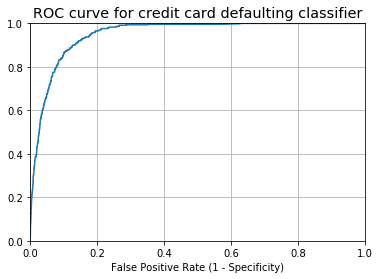

In [29]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for term subscriber classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [31]:
auc_roc_1 = str(roc_auc_score(y_test, y_pred_prob))
print('AUC with dimensionality reduction: \n' + auc_roc_1)
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC with dimensionality reduction: 
0.9501499945649863
AUC without dimensionality reduction: 
0.9506009383721328


In [34]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

#Basic terminology

#True Positives (TP): we correctly predicted that they would default.
#262
#True Negatives (TN): we correctly predicted that they won't default.
#3538
#False Positives (FP): we incorrectly predicted that they did default.
#118
#Falsely predict positive
#Type I error
#False Negatives (FN): we incorrectly predicted that they didn't default.
#201
#Falsely predict negative
#Type II error

[[3538  118]
 [ 201  262]]
